In [1]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-12-08 12:12:43--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.68.102, 74.125.68.138, 74.125.68.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.68.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-12-08 12:12:43--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.194.132, 2404:6800:4003:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.194.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  39.4MB/s    in 0.5s    

2024-12-08 12:12:47

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/412M [00:00<?, ?B/s]

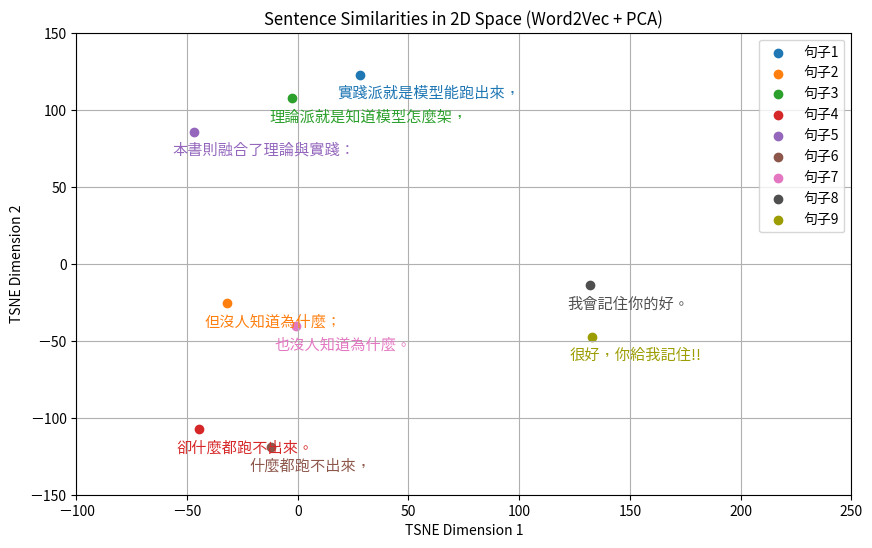

In [2]:
from transformers import AutoTokenizer, AutoModel
import numpy as np
import torch
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import cm

model_name = "bert-base-chinese"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# 示例句子
sentences = [
    "實踐派就是模型能跑出來，",
    "但沒人知道為什麼；",
    "理論派就是知道模型怎麼架，",
    "卻什麼都跑不出來。",
    "本書則融合了理論與實踐：",
    "什麼都跑不出來，",
    "也沒人知道為什麼。",
    "我會記住你的好。",
    "很好，你給我記住!!"
]

# 將句子轉換為向量
def sentence_to_vector(sentence, model, tokenizer):
    # 将句子 token 化
    inputs = tokenizer(sentence, return_tensors='pt')
    # 将 token 序列输入模型
    with torch.no_grad():
        outputs = model(**inputs)
        # 获取最后一个隐藏层的输出，即词向量
        last_hidden_states = outputs.last_hidden_state
    # 对所有 token 的向量求平均，得到句向量
    return torch.mean(last_hidden_states, dim=1).numpy()[0]

# 對所有句子生成嵌入
sentence_vectors = np.array([sentence_to_vector(sentence, model, tokenizer) for sentence in sentences])

# 降維至 2D
# 使用 t-SNE 降維至 2D
# 使用 t-SNE 降維至 2D
tsne = TSNE(n_components=2, perplexity=3, random_state=42, init='pca')  # 确保 perplexity 小于句子数量
reduced_vectors = tsne.fit_transform(sentence_vectors)
#pca = PCA(n_components=2)
#reduced_vectors = pca.fit_transform(sentence_vectors)

#colors = cm.rainbow(np.linspace(0.2, 0.8, len(sentences)))
#colors = cm.plasma(np.linspace(0, 0.9, len(sentences)))
colors = [
    '#1f77b4',  # 藍色
    '#ff7f0e',  # 橙色
    '#2ca02c',  # 綠色
    '#d62728',  # 红色
    '#9467bd',  # 紫色
    '#8c564b',  # 棕色
    '#e377c2',  # 粉色
    '#4f4f4f',  # 灰色
    '#9c9d02',  # 黄綠色
    '#17becf'   # 青色
]
# 視覺化句子之間的關係
plt.figure(figsize=(10, 6))
for i, (sentence, color) in enumerate(zip(sentences, colors)):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=f"句子{i+1}", color=color)
    plt.text(reduced_vectors[i, 0] - 10, reduced_vectors[i, 1] - 15, sentence, fontsize=11, color=color)

plt.title("Sentence Similarities in 2D Space (Word2Vec + PCA)")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
#xticks從-300到0
plt.xticks(np.arange(-100, 300, 50))
plt.yticks(np.arange(-150, 200, 50))
# letend移到左上方
plt.legend( loc='upper right')
plt.grid()
plt.show()

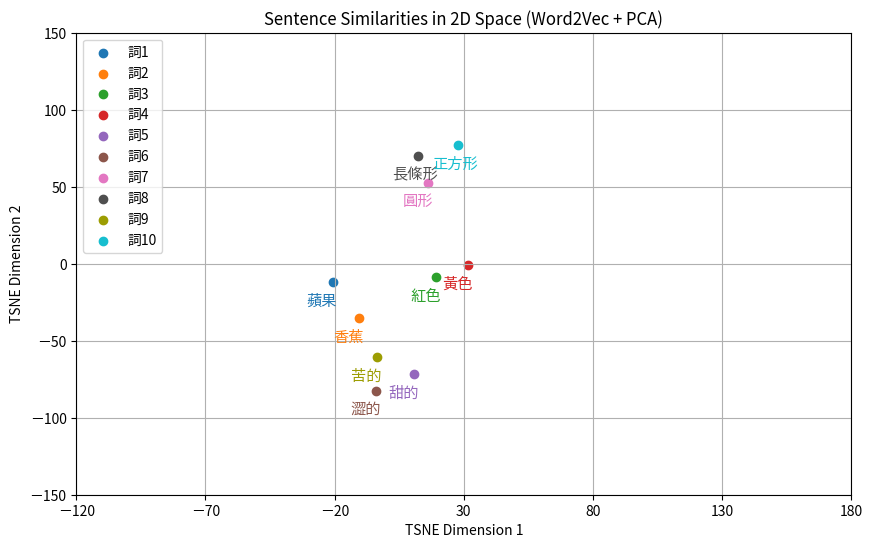

In [3]:
from transformers import AutoTokenizer, AutoModel
import numpy as np
import torch
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import cm

model_name = "bert-base-chinese"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# 示例句子
sentences = [
    "蘋果",
    "香蕉",
    "紅色",
    "黃色",
    "甜的",
    "澀的",
    "圓形",
    "長條形",
    "苦的",
    "正方形"
]

# 將句子轉換為向量
def sentence_to_vector(sentence, model, tokenizer):
    # 将句子 token 化
    inputs = tokenizer(sentence, return_tensors='pt')
    # 将 token 序列输入模型
    with torch.no_grad():
        outputs = model(**inputs)
        # 获取最后一个隐藏层的输出，即词向量
        last_hidden_states = outputs.last_hidden_state
    # 对所有 token 的向量求平均，得到句向量
    return torch.mean(last_hidden_states, dim=1).numpy()[0]

# 對所有句子生成嵌入
sentence_vectors = np.array([sentence_to_vector(sentence, model, tokenizer) for sentence in sentences])

# 降維至 2D
# 使用 t-SNE 降維至 2D
# 使用 t-SNE 降維至 2D
tsne = TSNE(n_components=2, perplexity=3, random_state=42, init='pca')  # 确保 perplexity 小于句子数量
reduced_vectors = tsne.fit_transform(sentence_vectors)
#pca = PCA(n_components=2)
#reduced_vectors = pca.fit_transform(sentence_vectors)

#colors = cm.rainbow(np.linspace(0.2, 0.8, len(sentences)))
#colors = cm.plasma(np.linspace(0, 0.9, len(sentences)))
colors = [
    '#1f77b4',  # 藍色
    '#ff7f0e',  # 橙色
    '#2ca02c',  # 綠色
    '#d62728',  # 红色
    '#9467bd',  # 紫色
    '#8c564b',  # 棕色
    '#e377c2',  # 粉色
    '#4f4f4f',  # 灰色
    '#9c9d02',  # 黄綠色
    '#17becf'   # 青色
]
# 視覺化句子之間的關係
plt.figure(figsize=(10, 6))
for i, (sentence, color) in enumerate(zip(sentences, colors)):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=f"詞{i+1}", color=color)
    plt.text(reduced_vectors[i, 0] - 10, reduced_vectors[i, 1] - 15, sentence, fontsize=11, color=color)

plt.title("Sentence Similarities in 2D Space (Word2Vec + PCA)")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
#xticks從-300到0
plt.xticks(np.arange(-120, 230, 50))
plt.yticks(np.arange(-150, 200, 50))
# letend移到左上方
plt.legend( loc='upper left')
plt.grid()
plt.show()